<a href="https://www.kaggle.com/code/prasadposture121/stellar-classification?scriptVersionId=112053015" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stellar Classfication

# 1. Loading the Data

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#loading the data
df=pd.read_csv('../input/stellar-classification-dataset-sdss17/star_classification.csv')
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

# 2. Exploratory Data Analysis

In [2]:
#getting the stastical information
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [3]:
#stastical information of categorical column
df.describe(include=['O'])

class
count   100000
unique       3
top     GALAXY
freq     59445

In [4]:
#counting the frequency of each element from the 'class'
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

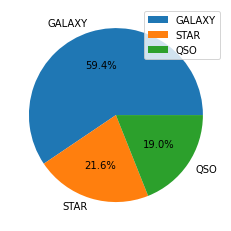

In [5]:
#proportion of different elements of the class
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

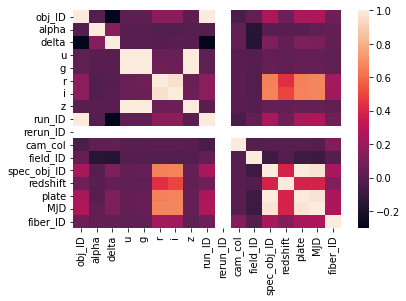

In [6]:
#correlation between the columns
sns.heatmap(df.corr());

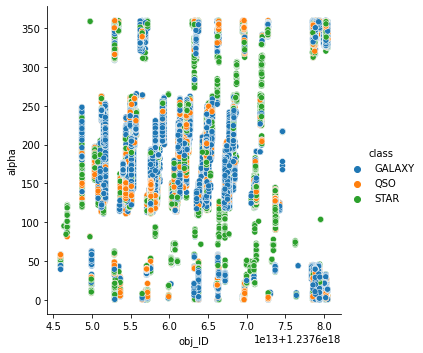

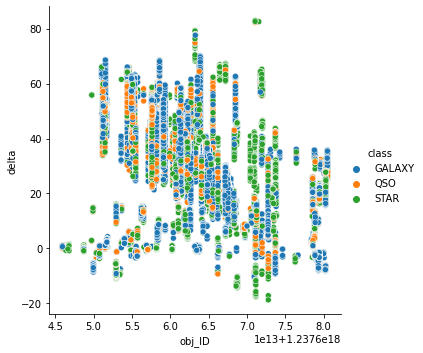

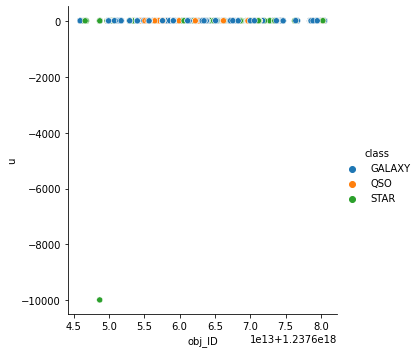

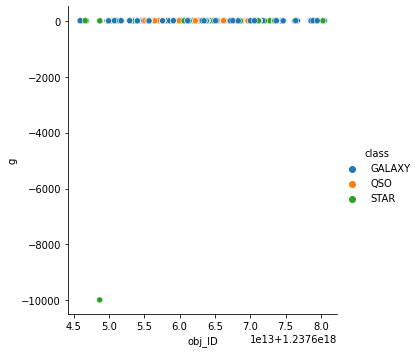

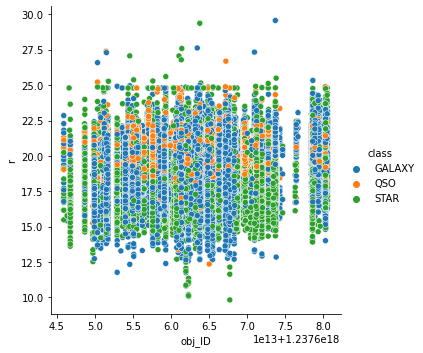

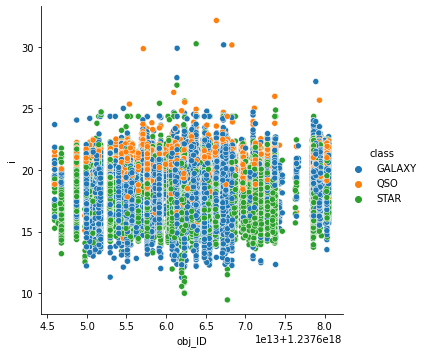

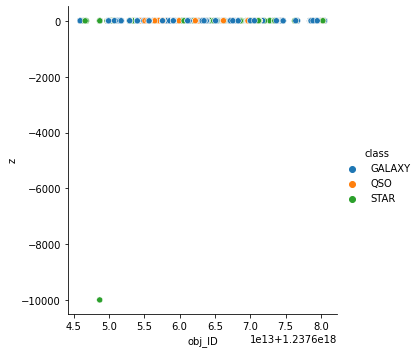

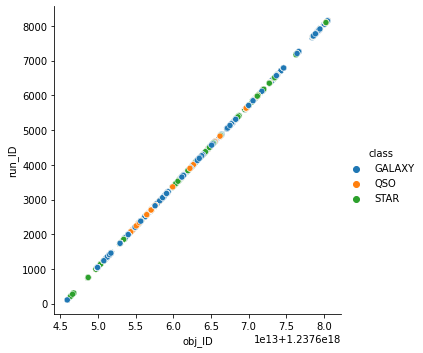

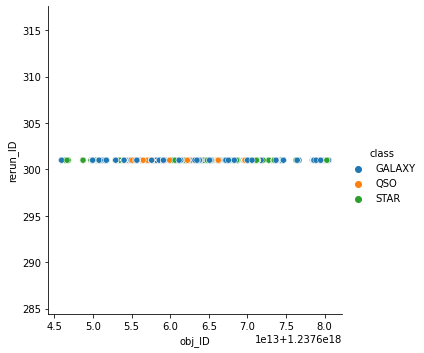

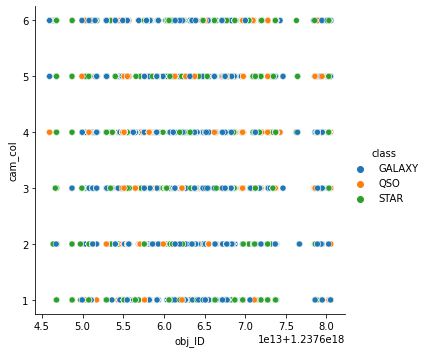

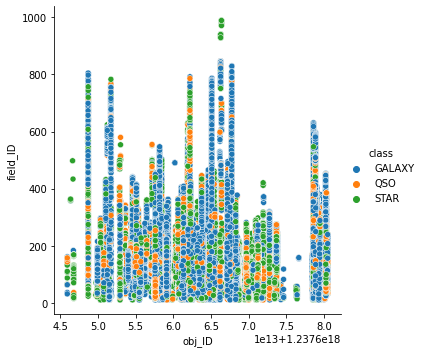

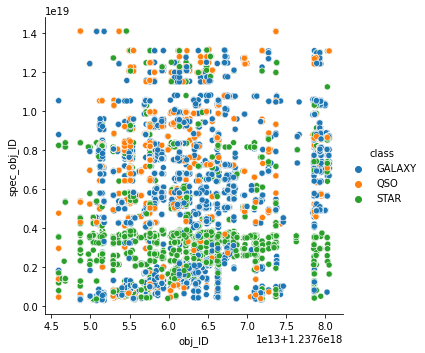

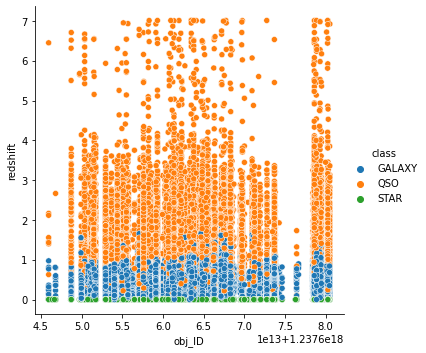

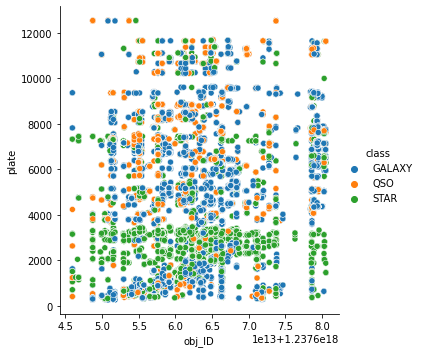

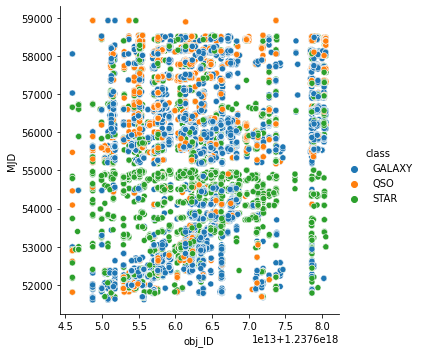

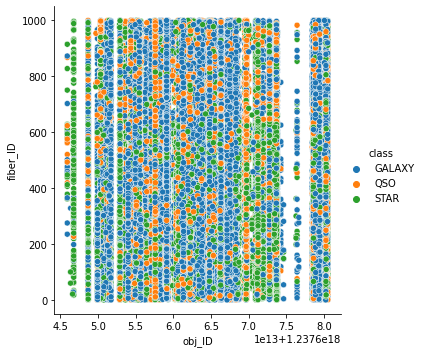

In [7]:
#comparing variations of different attributes with 'obj_ID'
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x='obj_ID', y=i, hue='class')
    plots.append(g);

Here it seems that the `redshift` plays an important part in the stellar classification since we can clearly distinguish between the various clusters of points. Attributes which are showing y=mx+c relationship with `obj_ID` are insiginificant and need to removed. Which include cam_col, run_ID and rerun_ID (we won't use this while fitting the model). It may seem that the relation of `u`, `g` and `z` is also of the simliar sorts but if you observed closely there is an outlier, which causes all the other data points to appear linear.

# 3. Feature Engineering

In [8]:
#dropping the unnecessary columns
df.drop(['obj_ID','cam_col', 'run_ID', 'rerun_ID'] ,axis=1, inplace=True)
df.shape

(100000, 14)

In [9]:
#Filtering the data
#Removing the outliers
print('Shape before filtering :',df.shape)
df=df[df.z>-2000]
df=df[df.u>-2000]
df=df[df.g>-2000]
print('Shape after filtering :',df.shape)
#There was only one value going off the limits 
#so we haven't loss signinficant amount of the data

Shape before filtering : (100000, 14)
Shape after filtering : (99999, 14)


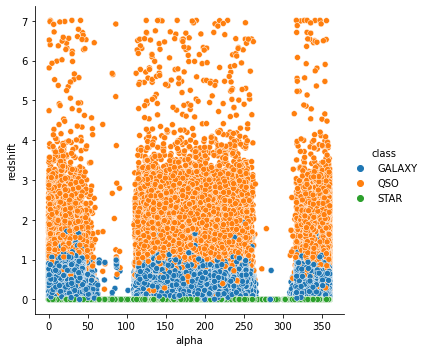

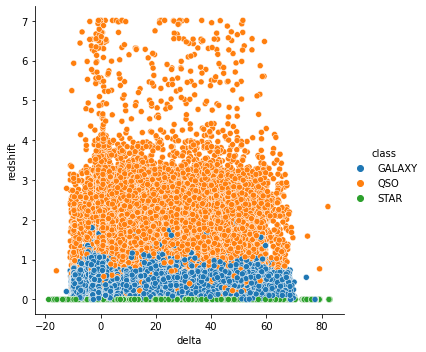

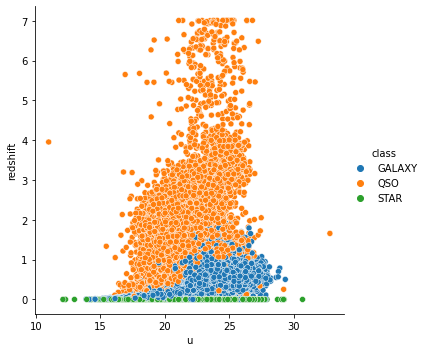

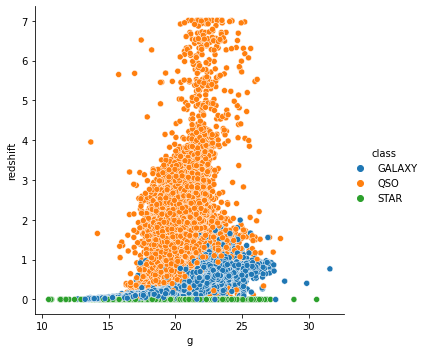

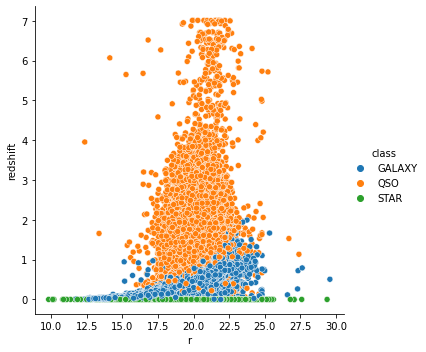

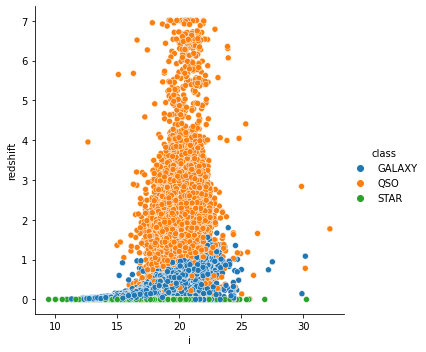

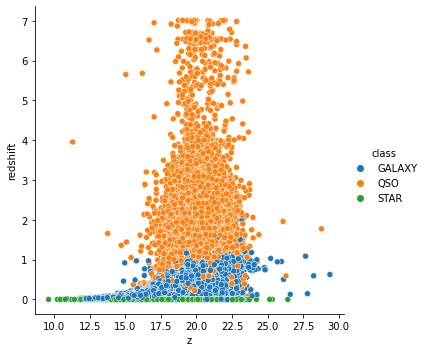

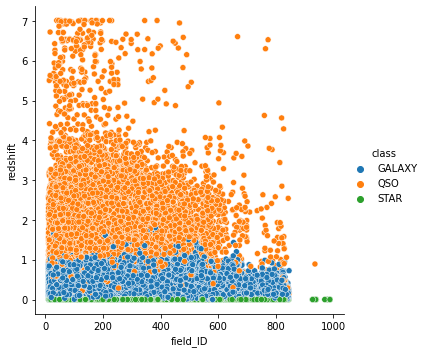

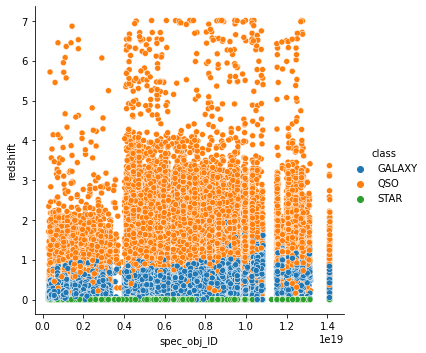

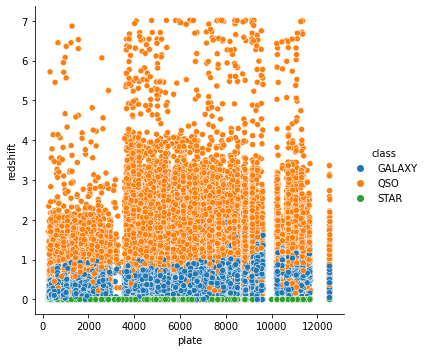

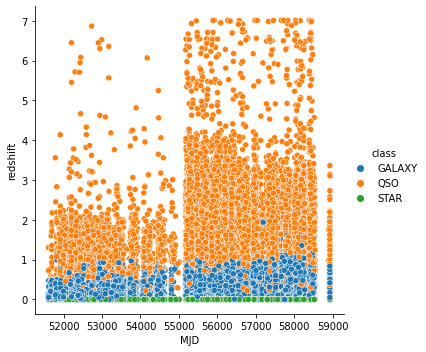

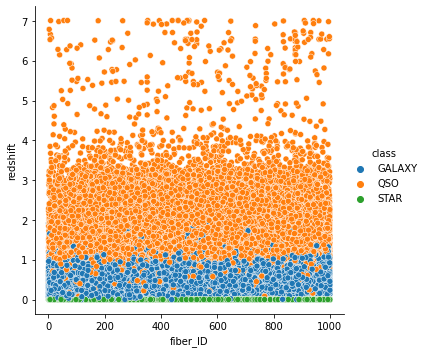

In [10]:
#since the 'redshift' is the most significant while classifying the data
#we will see the variations in other attributes with 'redshift'
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'spec_obj_ID',
          'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x=i, y='redshift', hue='class')
    plots.append(g);
#these plots show distribution of data points wrt to the redshift, and helps us identify the irrelevent attributes

In [11]:
#checking for missing values
df.isnull().sum()
#no missing values, that's a relief

alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [12]:
#we will use this processed data for different machine learning algorithms
processed_data=df.copy()
processed_data.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   field_ID   spec_obj_ID   class  redshift  plate    MJD  fiber_ID  
0        79  6.543777e+18  GALAXY  0.634794   5812  56354       171  
1       119  1.176014e+19  GALAXY  0.779136  10445  58158       427  
2       120  5.152200e+18  GALAXY  0.644195   4576  55592       299  
3       214  1.030107e+19  GALAXY  0.932346   9149  58039       775  
4       137  6.891865e+18  GALAXY  0.116123   6121  56187       842

# Unsupervised Learning Approch - I
We will use K-Means Clustering for **all** the remaining data attributes.

# 1. Loading the data

In [13]:
#we will use the copy of the saved data since we don't want to make any changes in it
df=processed_data.copy()
df.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   field_ID   spec_obj_ID   class  redshift  plate    MJD  fiber_ID  
0        79  6.543777e+18  GALAXY  0.634794   5812  56354       171  
1       119  1.176014e+19  GALAXY  0.779136  10445  58158       427  
2       120  5.152200e+18  GALAXY  0.644195   4576  55592       299  
3       214  1.030107e+19  GALAXY  0.932346   9149  58039       775  
4       137  6.891865e+18  GALAXY  0.116123   6121  56187       842

# 2. Modeling - I

In [14]:
#importing the function
from sklearn.cluster import KMeans 

#assinging the number of clusters
km=KMeans(n_clusters=3)

#fitting the model
#we are using all the columns in here
y_predicted=km.fit_predict(df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'spec_obj_ID',
                               'redshift', 'plate', 'MJD', 'fiber_ID']])

#appending the predictions to original dataset
df['cluster']=y_predicted
df.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   field_ID   spec_obj_ID   class  redshift  plate    MJD  fiber_ID  cluster  
0        79  6.543777e+18  GALAXY  0.634794   5812  56354       171        2  
1       119  1.176014e+19  GALAXY  0.779136  10445  58158       427        0  
2       120  5.152200e+18  GALAXY  0.644195   4576  55592       299        2  
3       214  1.030107e+19  GALAXY  0.932346   9149  58039       775        0  
4       137  6.891865e+18  GALAXY  0.116123   6121  56187       842        2

# 3. Checking the Accuracy with Visualization - I
We cannot directly check the accuracy of the model that uses unsupervised learning, since the labels aren't available to us as they do in supervised learning. But, in this particular dataset the labels are given,though, I'm not using them for training model like we do in superivsed learning, I can still use them to visualize the accuracy while comparing the clusters made by the unsupervised algorithm with the actual labels.

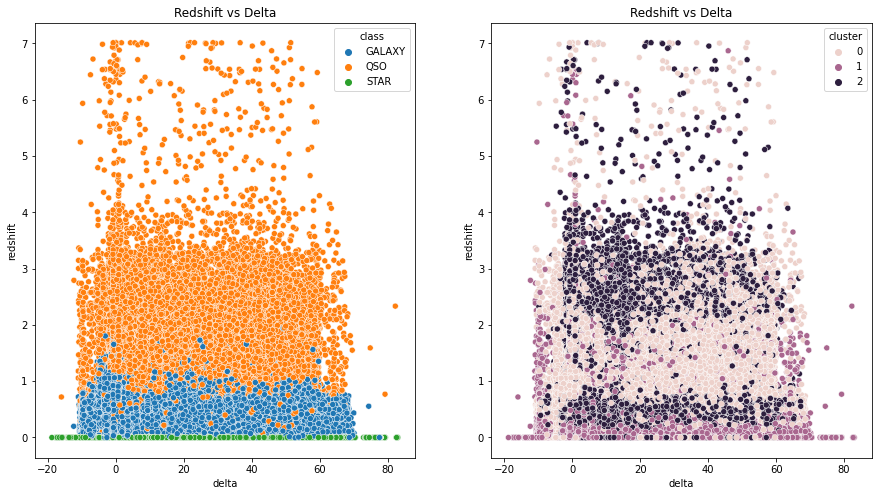

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15, 8))
axes[0].set_title('Redshift vs Delta')
sns.scatterplot(data=df,x='delta', y='redshift', hue='class', ax=axes[0])

axes[1].set_title('Redshift vs Delta')
sns.scatterplot(data=df,x='delta', y='redshift', hue='cluster', ax=axes[1]);

You can see from the plot that the clusters aren't made properly, means that the model isn't working properly.

# 4. Scaling
We will try to scale down the data using `MinMaxScaler()`. Scaling brings the data points in the range of 0 to 1.

In [16]:
df=processed_data.copy()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'spec_obj_ID',
                               'redshift', 'plate', 'MJD', 'fiber_ID']:
    df[i]=scaler.fit_transform(df[[i]])

# 5. Modeling - II

In [17]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'spec_obj_ID',
                               'redshift', 'plate', 'MJD', 'fiber_ID']])
df['cluster']=y_predicted
df.head()

alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.591347  0.558050  0.535344  0.427665  0.464377   
1  0.402286  0.491812  0.632603  0.584423  0.646203  0.515986  0.607035   
2  0.394960  0.534139  0.654888  0.576463  0.546218  0.435729  0.472194   
3  0.940947  0.180600  0.511384  0.629186  0.596946  0.486717  0.487460   
4  0.959118  0.392679  0.387463  0.335579  0.337999  0.287021  0.300043   

   field_ID  spec_obj_ID   class  redshift     plate       MJD  fiber_ID  \
0  0.069530     0.451585  GALAXY  0.091831  0.451592  0.648007  0.170170   
1  0.110429     0.828833  GALAXY  0.112389  0.828841  0.894320  0.426426   
2  0.111452     0.350946  GALAXY  0.093170  0.350949  0.543965  0.298298   
3  0.207566     0.723313  GALAXY  0.134210  0.723312  0.878072  0.774775   
4  0.128834     0.476759  GALAXY  0.017959  0.476753  0.625205  0.841842   

   cluster  
0        2  
1        2  
2        2  
3        0  
4        0

# 6. Checking the Accuracy with Visualization - II

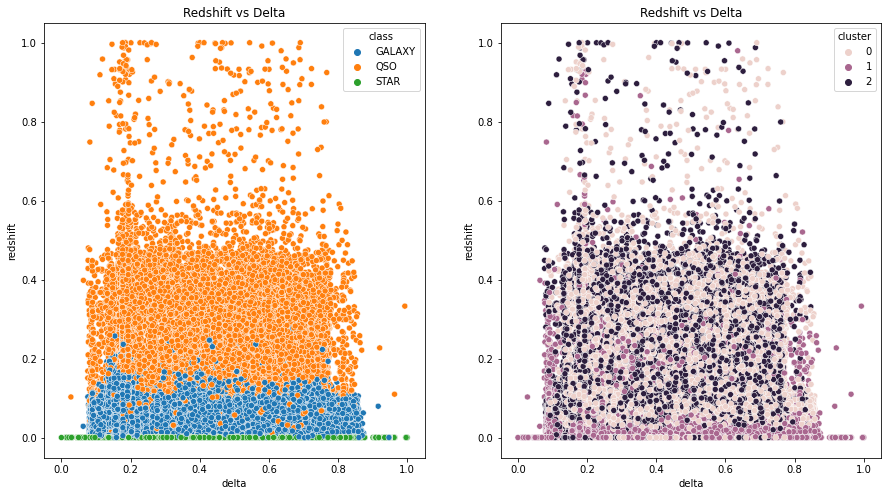

In [18]:
fig, axes = plt.subplots(1,2, figsize=(15, 8))
axes[0].set_title('Redshift vs Delta')
sns.scatterplot(data=df,x='delta', y='redshift', hue='class', ax=axes[0])

axes[1].set_title('Redshift vs Delta')
sns.scatterplot(data=df,x='delta', y='redshift', hue='cluster', ax=axes[1]);

Even though we have used scaling the clusters aren't clearly distinguishable as they are in the first plot.

# Unsupervised Learning Approch - II
We will use only those columns whose data is normally distributed with respect to the redshift. It includes '`u', 'g', 'r', 'i', 'z',` and off course the `'redshift'`.

# 1. Loading the Data

In [19]:
df=processed_data.copy()
df.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   field_ID   spec_obj_ID   class  redshift  plate    MJD  fiber_ID  
0        79  6.543777e+18  GALAXY  0.634794   5812  56354       171  
1       119  1.176014e+19  GALAXY  0.779136  10445  58158       427  
2       120  5.152200e+18  GALAXY  0.644195   4576  55592       299  
3       214  1.030107e+19  GALAXY  0.932346   9149  58039       775  
4       137  6.891865e+18  GALAXY  0.116123   6121  56187       842

# 2. Scaling

In [20]:
#scaling the relevent columns
scaler=MinMaxScaler()
for i in ['u', 'g', 'r', 'i', 'z','redshift']:
    df[i]=scaler.fit_transform(df[[i]])

# 3. Modeling

In [21]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['u', 'g', 'r', 'i', 'z','redshift']])
df['cluster']=y_predicted
df.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  0.591347  0.558050  0.535344  0.427665  0.464377   
1  144.826101  31.274185  0.632603  0.584423  0.646203  0.515986  0.607035   
2  142.188790  35.582444  0.654888  0.576463  0.546218  0.435729  0.472194   
3  338.741038  -0.402828  0.511384  0.629186  0.596946  0.486717  0.487460   
4  345.282593  21.183866  0.387463  0.335579  0.337999  0.287021  0.300043   

   field_ID   spec_obj_ID   class  redshift  plate    MJD  fiber_ID  cluster  
0        79  6.543777e+18  GALAXY  0.091831   5812  56354       171        1  
1       119  1.176014e+19  GALAXY  0.112389  10445  58158       427        1  
2       120  5.152200e+18  GALAXY  0.093170   4576  55592       299        1  
3       214  1.030107e+19  GALAXY  0.134210   9149  58039       775        1  
4       137  6.891865e+18  GALAXY  0.017959   6121  56187       842        2

# 4. Checking the Accuracy

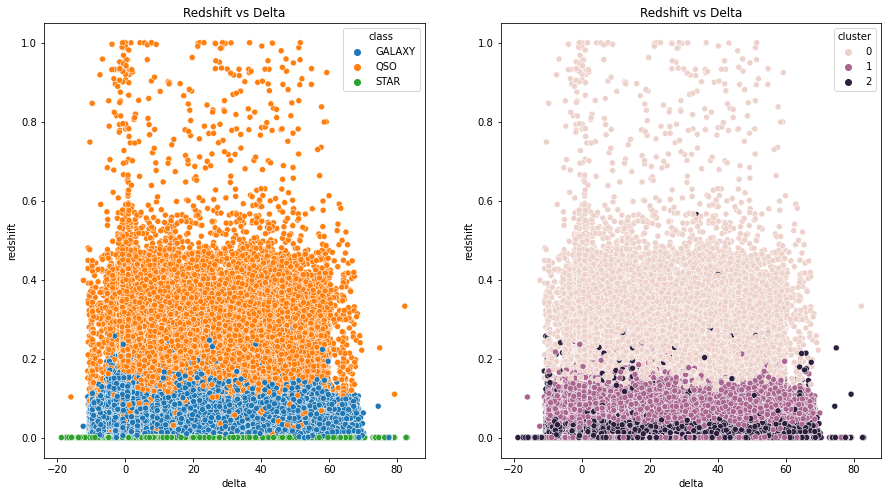

In [22]:
#with help of visualization
fig, axes = plt.subplots(1,2, figsize=(15, 8))
axes[0].set_title('Redshift vs Delta')
sns.scatterplot(data=df,x='delta', y='redshift', hue='class', ax=axes[0])

axes[1].set_title('Redshift vs Delta')
sns.scatterplot(data=df,x='delta', y='redshift', hue='cluster', ax=axes[1]);

In [23]:
#with the help of 'class' and 'cluster'
#labeling
l=list(df['cluster'].unique())
df['class'].replace({'GALAXY':l[0],'STAR':l[1],'QSO':l[2],},inplace=True)

#getting the accuracy
from sklearn.metrics import accuracy_score
print('The accuracy is :',accuracy_score(df['class'], df['cluster']))

The accuracy is : 0.6585265852658526


This accuracy much significant given the fact that we are using unsupervised learnig algorithm.

#### Thogh, we have been provided with the labels, I used KMeans clustering (an unsuperivsed learning algorithm) to make predictions on the dataset which gave me great accuracy when used on the scaled data.

We will now use a supervised algorithm for making predictions.

To be continued....